<div style="text-align: right"> 29.11.2019</div>

***Name:*** 

# Hausaufgabe Blatt 6

## Mathematisches Pendel

In dieser Aufgabe werden wir die Bewegungsgleichung eines (mathematischen) Pendels numerisch lösen. Die Bewegungsgleichung eines Pendels (ohne Kleinwinkelnäherung) lautet:

\begin{equation*}
       \ddot{\varphi} = -\frac{g}{L} \sin \varphi 
\end{equation*}

Um diese Gleichung numerisch lösen zu können, werden wir die gegeben Differentialgleichung zweiter Ordnung in zwei Differentialgleichungen erster Ordnung überführen:

\begin{align*}
        \dot \varphi &= \omega \tag{1}\\
        \dot \omega &= -\frac{g}{L} \sin  \varphi.  \tag{2}
\end{align*}

Bevor wir die Gleichungen (1) und (2) numerisch lösen können, müssen wir diese diskretisieren. Wie auf Aufgabenblatt 3 werden wir dazu das Euler Verfahren benutzen. Hier wird die Ableitung nach der Zeit durch kleine diskrete Änderungen in der Zeit $\Delta t$ approximiert. 

\begin{align*}
\dot \varphi &= \frac{\mathrm{d}\varphi}{\mathrm{d}t}\approx \frac{\Delta \varphi}{\Delta t} \\
\dot \omega &= \frac{\mathrm{d}\omega}{\mathrm{d}t}\approx \frac{\Delta \omega}{\Delta t} \\
\end{align*}

Umstellen der Gleichungen führt zu:
\begin{align*}
\Delta \varphi &= \omega \cdot \Delta t \\
\Delta \omega &= -\frac{g}{L} \sin  \varphi \cdot \Delta t.\\
\end{align*}

Dies sind die diskreten Änderungen im Winkel $\Delta \varphi$ und der Winkelgeschwindigkeit $\Delta \omega$ in nach einem Zeitschritt $\Delta t$.

Um also den neuen Winkel $\varphi\left(t+\Delta t\right)$ zum Zeitpunkt $t+\Delta t$ berechnen zu können, muss man lediglich die diskrete Änderung $\Delta \varphi$ auf den alten Winkel $\varphi\left(t\right)$ zum Zeitpunkt $t$ addieren (auch *update step* genannt). Gleiches gilt auch für die Winkelgeschwindigkeit $\omega$. Man erhält die nach dem Euler Verfahren diskretisierten Gleichungen:

\begin{align*}
    \varphi \left(t + \Delta t\right) &=\varphi\left(t \right) + \omega\left(t\right) \cdot \Delta t \tag{3}  \\
    \omega \left(t+\Delta t\right) &= \omega \left(t\right) -\frac{g}{L} \sin  \varphi \left(t\right) \cdot \Delta t  \tag{4}
\end{align*}

Wie Sie hier erkennen können, hängt die rechte Seite der obigen Gleichungen lediglich von $t$ (alter Zeitpunkt) und nicht von $t+\Delta t$ (neuer Zeitpunkt) ab.
### 1. Numerische Integration
**a)** Integrieren Sie die Pendelgleichungen (3 + 4) numerisch für $N=3000$ Zeitschritte, wobei $\Delta t=0.002$, $\omega(t=0)=0$ und $ \varphi_0 = \varphi(t=0)=\pi/4 $ sein soll. Wählen Sie für die Länge des Pendels $L=1$ und $g$ sei die Erdbeschleunigung.  

Beachten Sie, dass Sie dafür von `numpy` folgende Methoden benötigen: `np.pi`, `np.cos()` (in (b)), `np.sin()`

In [5]:
import numpy as np
at=3000
dt=0.002
o0=0              #\omega sei o
v0=(np.pi)/4        #\varphi sei v
L=1
g=9.81
v=[(np.pi)/4]          #Array für Auslenkung
o=[0]         #Array für Winkelgeschwindigkeit

for i in range (1, 2999):
    j=i
    j= o[j-1]-(g/L)*np.sin(v[j-1])*dt
    o.append(j)
    i= v[i-1]+o[i-1]*dt
    v.append(i)

**b)** Plotten Sie den Winkel des Pendels abhängig von der Zeit. Vergleichen Sie das Ergebnis mit der analytischen Lösung durch Kleinwinkelnäherung:

\begin{equation*}
\varphi\left(t\right) = \varphi_0 \cos \left( \sqrt{(g/L)} \cdot t \right).
\end{equation*}


Benutzen Sie angemessene Beschriftungen und Legenden. Was fällt Ihnen beim Vergleich auf?

*Tipp:* Benutzen Sie zum Erstellen des Zeit arrays anstelle von `np.linspace()` dieses Mal `np.arange(start, stop, width)`. Dabei wird ein array mit den Grenzen `[start, stop)` erstellt und der Abstand zwischen zwei konsekutiven Werten ist durch `width` gegeben.


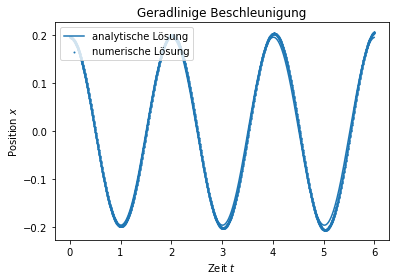

In [12]:
import matplotlib.pyplot as plt
#t = np.linspace(0, 5.998, 0.002)
t = np.arange(0, 5.998, 0.002)
vAnalytic = v0*np.cos(((g/L)**(1/2))*t)
vNumeric = v                          
#tNumeric = np.linspace(0, 2999*dt , 2999) 

fig, ax = plt.subplots()

ax.set_title("Geradlinige Beschleunigung")  # Titel
ax.plot(t, vAnalytic, label='analytische Lösung')  # x-Wert, hier x, y Wert hier xQuadrat
ax.scatter(t, vNumeric, label='numerische Lösung',s=1)
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Position $x$")

plt.legend(loc=2)
plt.show()

Mir fällt beim Vergleich auf: Es gibt eine leichte Phasenverschiebung, die Phase der numerischen Lösung dehnt sich aus.

**c)** Wiederholen Sie die Schritte **a)** und **b)** für $\varphi_0 = \pi/16.$ Was beobachten Sie?

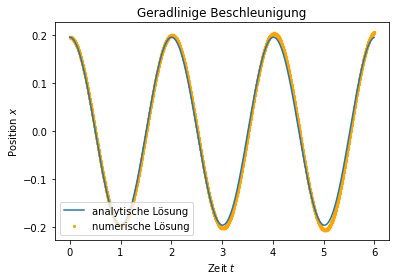

In [7]:
import numpy as np
at=3000
dt=0.002
o0=0              #\omega sei o
v0=(np.pi)/16        #\varphi sei v
L=1
g=9.81
v=[(np.pi)/16]          #Array für Auslenkung
o=[0]         #Array für Winkelgeschwindigkeit

for i in range (1, 2999):
    j=i
    j= o[j-1]-(g/L)*np.sin(v[j-1])*dt
    o.append(j)
    i= v[i-1]+o[i-1]*dt
    v.append(i)
    
import matplotlib.pyplot as plt
#t = np.linspace(0, 5.998, 0.002)
t = np.arange(0, 5.998, 0.002)
vAnalytic = v0*np.cos(((g/L)**(1/2))*t)
vNumeric = v                          
#tNumeric = np.linspace(0, 2999*dt , 2999) 

fig, ax = plt.subplots()

ax.set_title("Geradlinige Beschleunigung")  # Titel
ax.plot(t, vAnalytic, label='analytische Lösung')  # x-Wert, hier x, y Wert hier xQuadrat
ax.scatter(t, vNumeric, label='numerische Lösung', color='orange', s=5, marker='x')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Position $x$")

plt.legend(loc=3)
plt.show()

Ich beobachte:Das oben Aufgefallene ist fast behoben.